In [47]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [48]:
moviesData = pd.read_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\movie.csv")
moviesData

,Name,MovieCategory,Source
0,Arth,Drama,https://www.youtube.com/watch?v=E5zaXLDYt8E
1,Saaransh,Drama,https://www.dailymotion.com/video/xhpgqf
2,Parinda,Drama,https://m.youtube.com/watch?v=ye23ozGDglA
3,Lamhe,Drama,https://www.youtube.com/watch?v=r0Ov7pthyZ0
4,Hum Aapke Hain Koun..!,Drama,https://www.youtube.com/watch?v=n6FzuYNJ0V4
5,Dil Se..,Drama,https://www.youtube.com/watch?v=1V8hWtC509I
6,Teesri Manzil,Thriller,https://www.youtube.com/watch?v=zBiXElqdJec
7,Khoj,Thriller,https://www.youtube.com/watch?v=YAcZfF-g9EU
8,Baazigar,Thriller,https://www.youtube.com/watch?v=FacrW7dBTco
9,Gupt,Thriller,https://www.youtube.com/watch?v=9RSapEa_gSI


In [49]:
moviesData.describe(include='all')

,Name,MovieCategory,Source
count,32,32,32
unique,32,6,32
top,Arth,Drama,https://www.youtube.com/watch?v=E5zaXLDYt8E
freq,1,6,1


In [50]:
moviesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           32 non-null     object
 1   MovieCategory  32 non-null     object
 2   Source         32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [51]:
# Removing unwanted columns
moviesData = moviesData[['Name','MovieCategory','Source']]
moviesData

,Name,MovieCategory,Source
0,Arth,Drama,https://www.youtube.com/watch?v=E5zaXLDYt8E
1,Saaransh,Drama,https://www.dailymotion.com/video/xhpgqf
2,Parinda,Drama,https://m.youtube.com/watch?v=ye23ozGDglA
3,Lamhe,Drama,https://www.youtube.com/watch?v=r0Ov7pthyZ0
4,Hum Aapke Hain Koun..!,Drama,https://www.youtube.com/watch?v=n6FzuYNJ0V4
5,Dil Se..,Drama,https://www.youtube.com/watch?v=1V8hWtC509I
6,Teesri Manzil,Thriller,https://www.youtube.com/watch?v=zBiXElqdJec
7,Khoj,Thriller,https://www.youtube.com/watch?v=YAcZfF-g9EU
8,Baazigar,Thriller,https://www.youtube.com/watch?v=FacrW7dBTco
9,Gupt,Thriller,https://www.youtube.com/watch?v=9RSapEa_gSI


In [52]:
moviesData.duplicated().sum()

0

In [53]:
moviesData.isnull().sum()

Name             0
MovieCategory    0
Source           0
dtype: int64

In [54]:
moviesData['MovieCategory'].value_counts()

Drama       6
Thriller    6
Family      6
Musical     5
Comedy      5
Horror      4
Name: MovieCategory, dtype: int64

In [55]:
moviesDataEncoded = moviesData.copy()

In [58]:

features = ['MovieCategory','Name','Source']
label_encoder = LabelEncoder()

for col in features:
    moviesDataEncoded[col] = label_encoder.fit_transform(moviesDataEncoded[col])
    # print(label_encoder.inverse_transform(coursesData[col])

moviesData

,Name,MovieCategory,Source
0,Arth,Drama,https://www.youtube.com/watch?v=E5zaXLDYt8E
1,Saaransh,Drama,https://www.dailymotion.com/video/xhpgqf
2,Parinda,Drama,https://m.youtube.com/watch?v=ye23ozGDglA
3,Lamhe,Drama,https://www.youtube.com/watch?v=r0Ov7pthyZ0
4,Hum Aapke Hain Koun..!,Drama,https://www.youtube.com/watch?v=n6FzuYNJ0V4
5,Dil Se..,Drama,https://www.youtube.com/watch?v=1V8hWtC509I
6,Teesri Manzil,Thriller,https://www.youtube.com/watch?v=zBiXElqdJec
7,Khoj,Thriller,https://www.youtube.com/watch?v=YAcZfF-g9EU
8,Baazigar,Thriller,https://www.youtube.com/watch?v=FacrW7dBTco
9,Gupt,Thriller,https://www.youtube.com/watch?v=9RSapEa_gSI


Text(0, 0.5, 'Inertias')

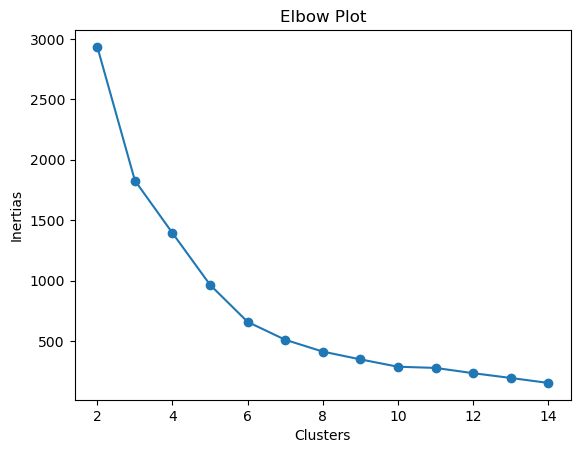

In [59]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, init='k-means++',random_state=0).fit(moviesDataEncoded)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("Inertias")

In [60]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(moviesDataEncoded)
kmeans

KMeans(n_clusters=6, random_state=0)

In [61]:
identifiedCluster = kmeans.fit_predict(moviesDataEncoded)
identifiedCluster = list(identifiedCluster)
identifiedCluster

[2,
 3,
 3,
 0,
 5,
 1,
 0,
 4,
 2,
 1,
 2,
 3,
 1,
 4,
 1,
 0,
 4,
 4,
 4,
 0,
 5,
 4,
 4,
 4,
 0,
 5,
 2,
 2,
 1,
 2,
 5,
 2]

In [62]:
import joblib
  
# Save the xgb_clf_tfidf model as a pickle in a file
joblib.dump(kmeans, r'C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\kmeansClusteringmovies.pkl')

['C:\\Users\\ASUS\\PycharmProjects\\Chat_bot\\utils\\csv\\kmeansClusteringmovies.pkl']

In [63]:
moviesDataEncoded["cluster_predicted"] = identifiedCluster
moviesDataEncoded

,Name,MovieCategory,Source,cluster_predicted
0,2,1,12,2
1,28,1,2,3
2,23,1,1,3
3,21,1,28,0
4,15,1,25,5
5,10,1,4,1
6,30,5,31,0
7,19,5,18,4
8,4,5,13,2
9,14,5,10,1


In [64]:
moviesData["cluster_predicted"] = identifiedCluster
moviesData

,Name,MovieCategory,Source,cluster_predicted
0,Arth,Drama,https://www.youtube.com/watch?v=E5zaXLDYt8E,2
1,Saaransh,Drama,https://www.dailymotion.com/video/xhpgqf,3
2,Parinda,Drama,https://m.youtube.com/watch?v=ye23ozGDglA,3
3,Lamhe,Drama,https://www.youtube.com/watch?v=r0Ov7pthyZ0,0
4,Hum Aapke Hain Koun..!,Drama,https://www.youtube.com/watch?v=n6FzuYNJ0V4,5
5,Dil Se..,Drama,https://www.youtube.com/watch?v=1V8hWtC509I,1
6,Teesri Manzil,Thriller,https://www.youtube.com/watch?v=zBiXElqdJec,0
7,Khoj,Thriller,https://www.youtube.com/watch?v=YAcZfF-g9EU,4
8,Baazigar,Thriller,https://www.youtube.com/watch?v=FacrW7dBTco,2
9,Gupt,Thriller,https://www.youtube.com/watch?v=9RSapEa_gSI,1


In [65]:
moviesData.describe()

,cluster_predicted
count,32.000000
mean,2.500000
std,1.684847
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [66]:
cluster_0 = moviesData[moviesData['cluster_predicted'] == 0]
cluster_1 = moviesData[moviesData['cluster_predicted'] == 1]
cluster_2 = moviesData[moviesData['cluster_predicted'] == 2]
cluster_3 = moviesData[moviesData['cluster_predicted'] == 3]
cluster_4 = moviesData[moviesData['cluster_predicted'] == 4]
cluster_5 = moviesData[moviesData['cluster_predicted'] == 5]

In [67]:
cluster_1.head(5)

,Name,MovieCategory,Source,cluster_predicted
5,Dil Se..,Drama,https://www.youtube.com/watch?v=1V8hWtC509I,1
9,Gupt,Thriller,https://www.youtube.com/watch?v=9RSapEa_gSI,1
12,Disco Dancer,Musical,https://m.youtube.com/watch?v=vj6oKpcK8mU,1
14,Dil To Pagal Hai,Musical,https://www.youtube.com/watch?v=-VKeP8WKZiU,1
28,Gol Maal,Comedy,https://www.youtube.com/watch?v=2po8kELDZY8,1


In [68]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               7 non-null      object
 1   MovieCategory      7 non-null      object
 2   Source             7 non-null      object
 3   cluster_predicted  7 non-null      int32 
dtypes: int32(1), object(3)
memory usage: 252.0+ bytes


In [69]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 11
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3 non-null      object
 1   MovieCategory      3 non-null      object
 2   Source             3 non-null      object
 3   cluster_predicted  3 non-null      int32 
dtypes: int32(1), object(3)
memory usage: 108.0+ bytes


In [70]:
# # Load the model from the file
kmeans_model = joblib.load(r'C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\kmeansClusteringmovies.pkl')
kmeans_model

KMeans(n_clusters=6, random_state=0)

In [71]:
moviesData.to_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\moviesData.csv",header=True, index=False)
moviesDataEncoded.to_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\moviesDataEnc.csv",header=True, index=False)